In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame= True)
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target == 2)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)
X.shape

(150, 2)

In [39]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ True, False])

In [40]:
svm_clf.decision_function(X_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 0.66163816, -0.22035761])

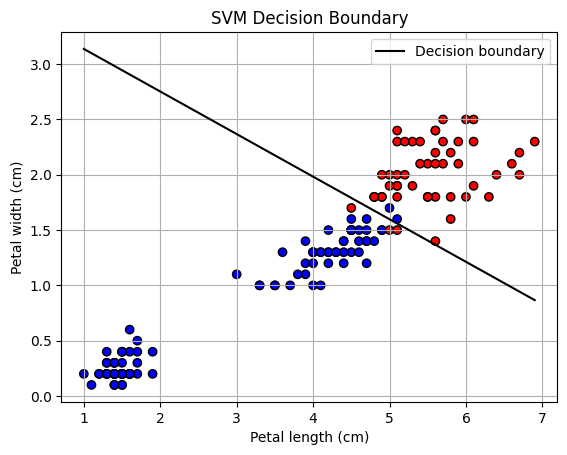

In [41]:
# Get model and scaler from pipeline
model = svm_clf.named_steps["linearsvc"]
scaler = svm_clf.named_steps["standardscaler"]

# Get the weights and bias
w = model.coef_[0]
b = model.intercept_[0]

# Create x-axis range in scaled space
X_scaled = scaler.transform(X)
x0 = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
x1 = -(w[0] * x0 + b) / w[1]

# Convert back to original feature space for plotting
boundary = scaler.inverse_transform(np.c_[x0, x1])

# Plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.plot(boundary[:, 0], boundary[:, 1], "k-", label="Decision boundary")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("SVM Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

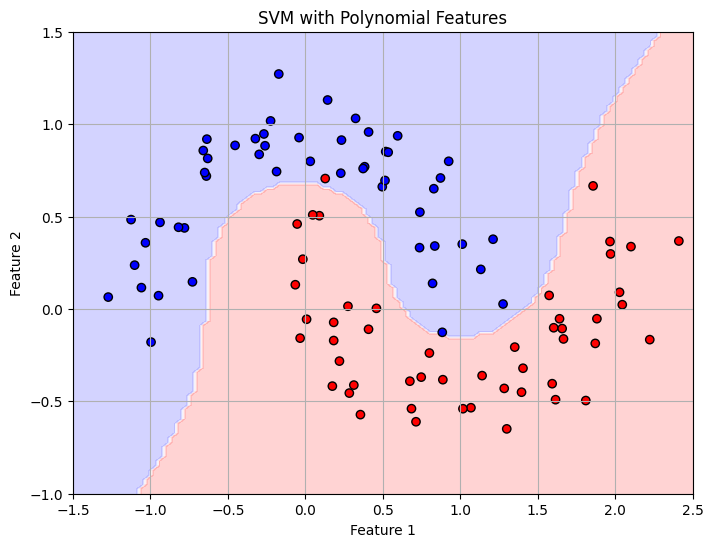

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], resolution=100, plot_title="SVM with Polynomial Features"):
    x0s = np.linspace(axes[0], axes[1], resolution)
    x1s = np.linspace(axes[2], axes[3], resolution)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = clf.predict(X_new).reshape(x0.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(x0, x1, y_predict, cmap="bwr", alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors='k')
    plt.title(plot_title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(axes[0], axes[1])
    plt.ylim(axes[2], axes[3])
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_decision_boundary(polynomial_svm_clf, X, y)


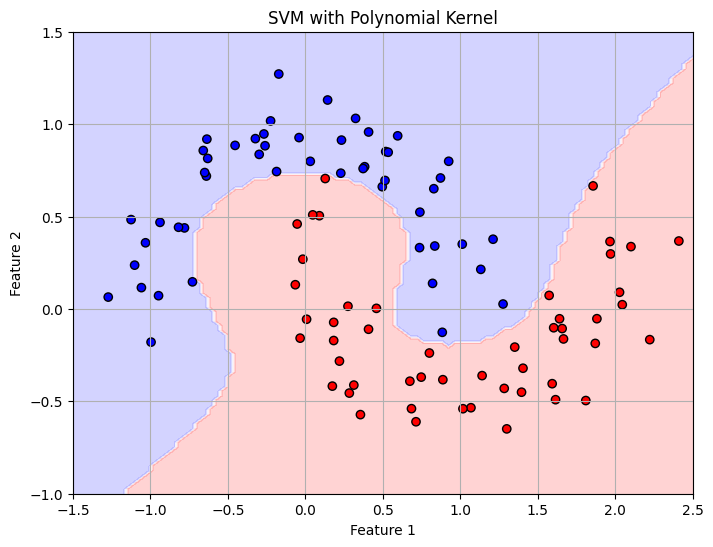

In [44]:
from sklearn.svm import SVC

X,y = make_moons(n_samples=100, noise = 0.15, random_state=42)

poly_svm_clf = make_pipeline(StandardScaler(),
                        SVC(kernel='poly',degree=5, coef0=2,C=10))

poly_svm_clf.fit(X,y)
plot_decision_boundary(poly_svm_clf, X, y, plot_title="SVM with Polynomial Kernel")


# SVC

In [54]:
from sklearn.svm import LinearSVR

iris = load_iris(as_frame= True)
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = (iris.target == 2)
svr_clf = make_pipeline(StandardScaler()
                        ,LinearSVR(epsilon=0.1,C=0.01,random_state=42) )
svr_clf.fit(X,y)

svr_clf_1 = make_pipeline(StandardScaler(),
                          LinearSVR(epsilon=0.1,C=100,random_state=42) )
svr_clf_1.fit(X,y)


/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(C=100, epsilon=0.1, random_state=42))])

In [62]:
from sklearn.svm import SVR

X, y = make_moons(n_samples=100,noise = 0.15,random_state=42)  # a quadratic dataset
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel="poly", degree=2, C=100, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2, kernel='poly'))])

In [63]:
X_1D = X[:,0].reshape(-1,1)
svm_poly_reg.fit(X_1D, y)
x_test = np.linspace(X_1D.min(), X_1D.max(), 300).reshape(-1, 1)
y_pred = svm_poly_reg.predict(x_test)


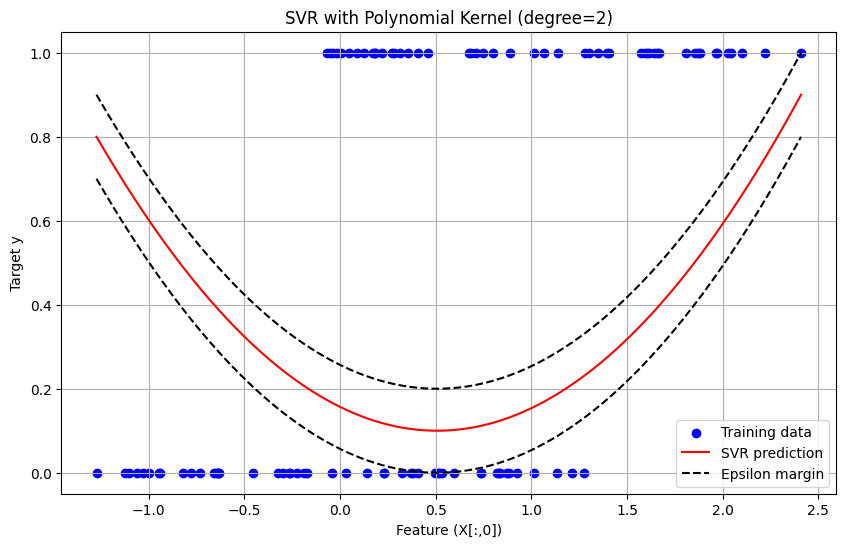

In [64]:

plt.figure(figsize=(10, 6))
plt.scatter(X_1D, y, c='blue', label='Training data')
plt.plot(x_test, y_pred, 'r-', label='SVR prediction')
plt.plot(x_test, y_pred + 0.1, 'k--', label='Epsilon margin')
plt.plot(x_test, y_pred - 0.1, 'k--')
plt.xlabel("Feature (X[:,0])")
plt.ylabel("Target y")
plt.title("SVR with Polynomial Kernel (degree=2)")
plt.legend()
plt.grid(True)
plt.show()
